Lab 1: Jupyter, Pandas, and Matplotlib
============

This lab will help you get started with Jupyter, and with manipulating and visualizing dataframes.

You will need to be able to run jupyter, and you may need to install several additional libraries. 
- Instructions via [pip](https://www.scipy.org/install.html)
- [anaconda](https://www.continuum.io/downloads), a collection of packages for scientific computing
- You'll also need the data, which is also in the repository.

I wrote the notebook using Python 2.7, but it *should* work in Python 3.5 as well.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# this puts the plots in the notebook, rather than as separate windows
%matplotlib inline 
from __future__ import print_function #python3 print statements

[A tutorial about Jupyter notebooks](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb)

Some very, very minimal tips:

- You can execute a cell by pressing control-return.
    - For code cells, this runs the python code
    - For Markdown cells, this "compiles" the markdown
    - Markdown cells can include hyperlinks and $\LaTeX$
- modes
    - "enter": enters edit mode
    - "escape": exits edit mode
- You can create a new cell with ctrl-m b
- You can delete a cell by hitting "dd", if you're not in edit mode
- If you get stuck, try to interrupt or restart the kernel (kernel menu)

# Loading a CSV file into a Pandas dataframe

In [4]:
df = pd.read_csv('correlatesofstatepolicyprojectv1_10.csv')

/home/jacobe/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (683,748,751,756,757,760,772,774,857,872) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,year,st,stateno,state,state_fips,state_icpsr,pollib_median,pollib_lower,pollib_upper,pollib_sd,...,wideo,pid,ideo,npid,mood,democrat,republican,liberal,conservative,hou_chamber
0,1900,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1904,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# rows, columns
df.shape

(5967, 928)

In [7]:
df.keys()

Index(['year', 'st', 'stateno', 'state', 'state_fips', 'state_icpsr',
       'pollib_median', 'pollib_lower', 'pollib_upper', 'pollib_sd',
       ...
       'wideo', 'pid', 'ideo', 'npid', 'mood', 'democrat', 'republican',
       'liberal', 'conservative', 'hou_chamber'],
      dtype='object', length=928)

In [8]:
df['state'].head()

0    Alaska
1    Alaska
2    Alaska
3    Alaska
4    Alaska
Name: state, dtype: object

Codes are explained here: http://ippsr.msu.edu/sites/default/files/CorrelatesCodebook.pdf

# Computing basic statistics

Let's compute the mean per-state population in 1950.

To do this, we need to isolate the entries in the dataframe where the year is 1950.

In [9]:
# this is a Series
(df['year']==1950).head()

0    False
1    False
2    False
3    False
4    False
Name: year, dtype: bool

`df.loc` takes a boolean Series, and returns a dataframe containing the entries that meet the boolean condition.

In [10]:
df_1950 = df.loc[df['year']==1950]

In [11]:
df_1950.head()

,year,st,stateno,state,state_fips,state_icpsr,pollib_median,pollib_lower,pollib_upper,pollib_sd,...,wideo,pid,ideo,npid,mood,democrat,republican,liberal,conservative,hou_chamber
50,1950,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,1950,AL,1.0,Alabama,1,41,-0.858539,-1.372300,-0.437250,0.286938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,1950,AR,4.0,Arkansas,5,42,-1.113870,-1.618420,-0.676702,0.287288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,1950,AZ,3.0,Arizona,4,61,-0.180736,-0.597317,0.173207,0.232623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,1950,CA,5.0,California,6,71,1.116370,0.828540,1.405870,0.176360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_1950['pop_annual'].head()

50       135000.0
167     3100000.0
284     1900000.0
401      756000.0
518    11000000.0
Name: pop_annual, dtype: float64

In [13]:
print("mean population = %d"%df_1950['pop_annual'].mean())
print("population std deviation = %d"%df_1950['pop_annual'].std())
print ("median population = %d"%df_1950['pop_annual'].median())

mean population = 2996568
population std deviation = 3138367
median population = 2200000


When the median and mean are significantly different, this suggests that the distribution is non-normal. 

Let's visualize it in a histogram.

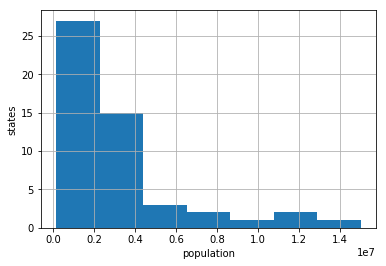

In [14]:
# built-in pandas plotting functionality
df_1950['pop_annual'].hist(bins=7)
plt.xlabel('population')
plt.ylabel('states');

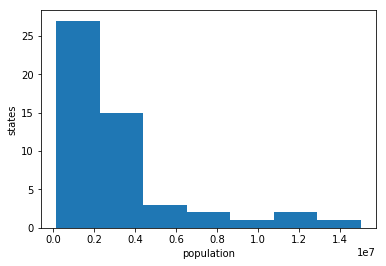

In [15]:
# matplotlib
plt.hist(df_1950['pop_annual'],bins=7)
plt.xlabel('population')
plt.ylabel('states');

Let's try the log-population and see if that is more normal.

In [16]:
# numpy is the numerical python library
import numpy as np 

mean log population = 14.91
median log population = 14.60


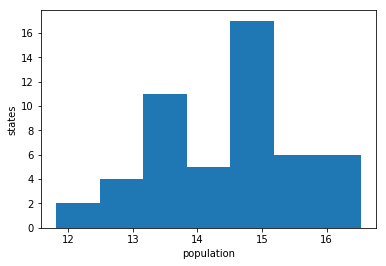

In [17]:
print( "mean log population = %.2f"%np.log(df_1950['pop_annual'].mean()))
print( "median log population = %.2f"%np.log(df_1950['pop_annual'].median()))
# matplotlib
plt.hist(np.log(df_1950['pop_annual']),bins=7)
plt.xlabel('population')
plt.ylabel('states');

**Your turn**: Do the same analysis for another variable of your choice. 
Again, the codes are listed here: http://ippsr.msu.edu/sites/default/files/CorrelatesCodebook.pdf

In [18]:
# your code here
# ctrl-m b makes new blocks
# pressing 'd' twice deletes blocks

# Change over time

Let's compare Georgia and New Jersey

In [19]:
df_ga = df.loc[df['st']=='GA']
df_nj = df.loc[df['st']=='NJ']

`pollib_median` is a measure of the political liberalism in each state, during each year. Let's plot it.

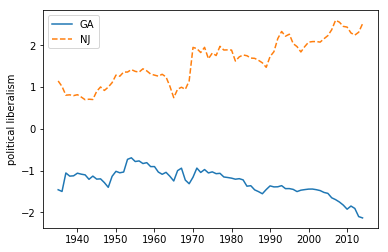

In [20]:
plt.plot(df_ga['year'],df_ga['pollib_median'])
# use linestyle to make plots that are readable without color
plt.plot(df_nj['year'],df_nj['pollib_median'],linestyle='--')
# always have a legend
plt.legend(['GA','NJ'])
plt.ylabel('political liberalism');

Here's spending on higher education over the same period. 

Definition: "What is the per student subsidy for
higher education?"

In [21]:
high_ed = 'z_education_higher_edu_spending'

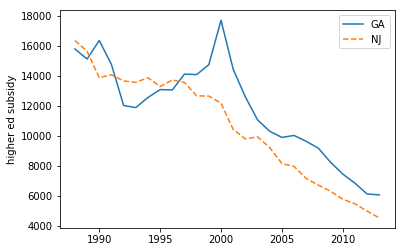

In [22]:
plt.plot(df_ga['year'],df_ga[high_ed])
plt.plot(df_nj['year'],df_nj[high_ed],linestyle='--')
plt.legend(['GA','NJ'])
plt.ylabel('higher ed subsidy');

Per-student public education spending is going down in both conservative Georgia and liberal New Jersey. Is this a nationwide trend?

**Your turn:** Add another state to the figures above.

In [23]:
# your code here

## Aggregating across states

In [23]:
# this produces a dataframe with one entry per year, taking the median across all states in that year
df_years = df.groupby('year').aggregate(np.median)
df_years.head(3)

,stateno,state_fips,state_icpsr,pollib_median,pollib_lower,pollib_upper,pollib_sd,st_ec,st_soc,avgec_low,...,wideo,pid,ideo,npid,mood,democrat,republican,liberal,conservative,hou_chamber
year,,,,,,,,,,,,,,,,,,,,,
1900,25.0,29,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,25.0,29,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,25.0,29,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


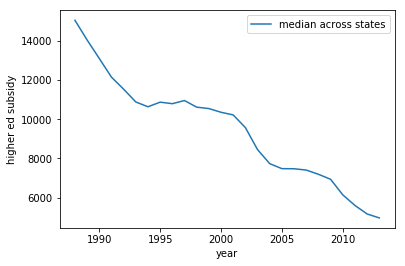

In [24]:
plt.plot(df_years[high_ed])
plt.ylabel('higher ed subsidy')
plt.xlabel('year')
plt.legend(['median across states']);

**Your turn:** Produce a plot that shows both the median and the mean over time

In [27]:
# your code here

`groupby` and `aggregate` are powerful commands, but they take a little practice to understand. There's more documentation here: https://pandas.pydata.org/pandas-docs/stable/groupby.html

## Showing the whole distribution

What about the rest of the distribution over states? Seaborn is a visualization library that is good at showing distributions.

In [31]:
# you may need to run "pip install --user seaborn" first 
import seaborn as sns;

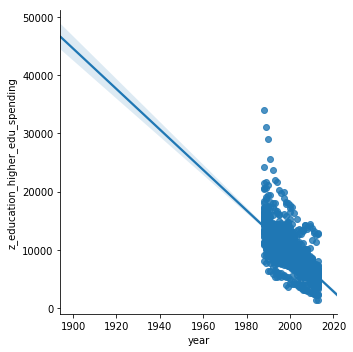

In [32]:
sns.lmplot(x='year',y=high_ed,data=df);

Not too good! The problem is that there is no data for the higher education statistic in years before around 1990.

Let's try restricting the plot to only the rows where the higher education data is available. We can do this using `df.loc` and `isnull`.

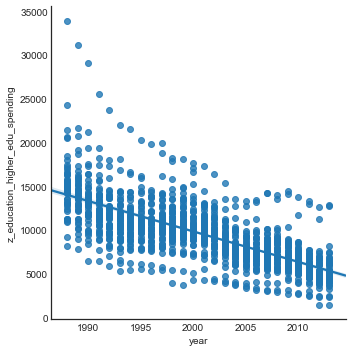

In [33]:
sns.set_style('white') # this looks a little nicer to me
sns.lmplot(x='year',y=high_ed,data=df.loc[~(df[high_ed].isnull())]);

Question: do liberal states cut education spending more or less than conservative states?

To answer this, you need to do the following: 

- Assign states to be politically left, moderate, or right, based on `pollib_median`
    - To do this, for each state, get the mean value of `pollib_median` from the years 1988 to the present
        - To do this, you need to create an aggregated dataframe, using `np.mean`
    - Apply `df.qcut` to discretize into three equal bins: left, moderate, and right
- Add a column to the original dataframe, indicating your grouping
    - To do this, you will need to call `pd.merge`
- Then use the 'hue' tag in lmplot to show the different state groups  

In [34]:
# aggregating all statistics by mean
df_states = df.loc[df['year']>1988].groupby('state').aggregate(np.mean)

In [35]:
df_states.head(3)

,year,stateno,state_fips,state_icpsr,pollib_median,pollib_lower,pollib_upper,pollib_sd,st_ec,st_soc,...,wideo,pid,ideo,npid,mood,democrat,republican,liberal,conservative,hou_chamber
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2002.5,1.0,1.0,41.0,-1.828390,-2.337310,-1.415481,0.282576,-0.038403,-0.271491,...,-0.271873,-0.001478,-0.286155,331.217391,39.601136,33.111134,31.203162,14.888115,41.797700,0.218316
Alaska,2002.5,2.0,2.0,81.0,0.459143,0.015579,0.925451,0.275826,NaN,NaN,...,-0.244973,-0.109096,-0.168719,46.647059,37.275091,25.982322,33.107432,16.113119,38.438294,0.682778
Arizona,2002.5,3.0,4.0,61.0,-0.739696,-1.097565,-0.315963,0.239679,-0.050711,0.058062,...,-0.122654,-0.072164,-0.132834,307.304348,43.298727,28.380686,32.275975,18.206794,36.033894,0.523737


In [36]:
# assigning each state a label, based on their average liberalism
df_states['politics'] = pd.qcut(df_states['pollib_median'],3,labels=['right','center','left'])

In [37]:
# this is a series
df_states['politics'].head()

state
Alabama        right
Alaska        center
Arizona        right
Arkansas       right
California      left
Name: politics, dtype: category
Categories (3, object): [right < center < left]

We need to merge this information back into the original dataframe `df`, but AFAIK, we can't merge a Series and a dataframe. We need a dataframe instead.

In [38]:
# this is a dataframe
df_states[['politics']].head()

,politics
state,
Alabama,right
Alaska,center
Arizona,right
Arkansas,right
California,left


Now we want to merge this information about each state's political orientation back into the main dataframe.

Some documentation here: https://pandas.pydata.org/pandas-docs/stable/merging.html#joining-key-columns-on-an-index

In [39]:
# This command took a minute to figure out...
df_merged = pd.merge(df,df_states[['politics']],left_on='state',right_index=True,how='inner')

In [40]:
df_merged.keys()

Index(['year', 'st', 'stateno', 'state', 'state_fips', 'state_icpsr',
       'pollib_median', 'pollib_lower', 'pollib_upper', 'pollib_sd',
       ...
       'pid', 'ideo', 'npid', 'mood', 'democrat', 'republican', 'liberal',
       'conservative', 'hou_chamber', 'politics'],
      dtype='object', length=929)

Note that the last key is `politics`, which is what we want.

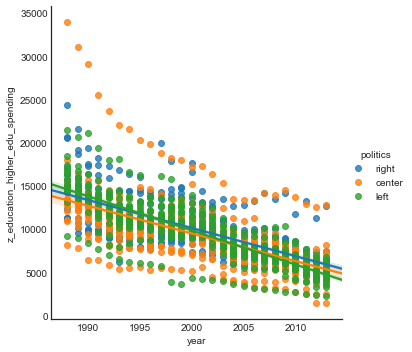

In [41]:
sns.set_style('white')
sns.lmplot(x='year',
           y=high_ed,
           hue='politics',
           data=df_merged.loc[~(df[high_ed].isnull())]);
plt.savefig('higher-ed-spending.pdf') # just for fun, this is how you save a PDF of your figure

**Your turn**: create a similar figure, plotting some other continuous variable over time

In [ ]:
# your code here